# Results 2 - Powercell - More Capacity

* Results from various models

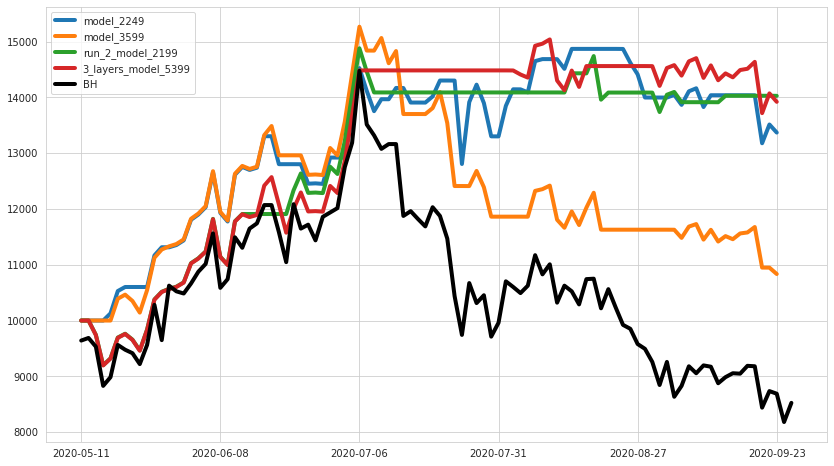

A R E A - U N D E R - C U R V E - S C O R E
model_2249 1259138
model_3599 1157239
run_2_model_2199 1232419
3_layers_model_5399 1251757
BH 1025011


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.metrics import auc

from tensorflow.keras.models import load_model

from RESULTS_pcell_basic_HELPERS import Helpers
from RESULTS_pcell_basic_HELPERS2 import Helpers as Helpers2



helpers = Helpers()
helpers2 = Helpers2()
# Load models and get scores
filenames = ['model_2249', 'model_3599', 'run_2_model_2199', '3_layers_model_5399']
a_score, BH, a_auc = helpers.inference(load_model(filenames[0]))
b_score, _, b_auc = helpers.inference(load_model(filenames[1]))
c_score, _, c_auc = helpers2.inference(load_model(filenames[2]))
d_score, _, d_auc = helpers2.inference(load_model(filenames[3]))
scores = [a_score, b_score, c_score, d_score]
aucs = [a_auc, b_auc, c_auc, d_auc]
# Plot
_, _, train, test = helpers.get_data()
test_len = 98
ticks_test = [i for i in range(0, test_len, test_len // 5 )]
dates_test = [test['date'].iloc[i] for i in range(0, test_len, test_len // 5)]
sns.set_style('whitegrid')
plt.figure(figsize=(14, 8))
for score, name in zip(scores, filenames):
    plt.plot(score, linewidth=4, label=name)
plt.plot(BH, 'k', linewidth=4, label='BH')
plt.legend(loc='best')
plt.xticks(ticks_test, dates_test)
plt.show()
# AUC
x = np.arange(len(BH))
print('A R E A - U N D E R - C U R V E - S C O R E')
for value, name in zip(aucs, filenames):
    print(name, int(value))
print('BH', int(auc(x, BH)))

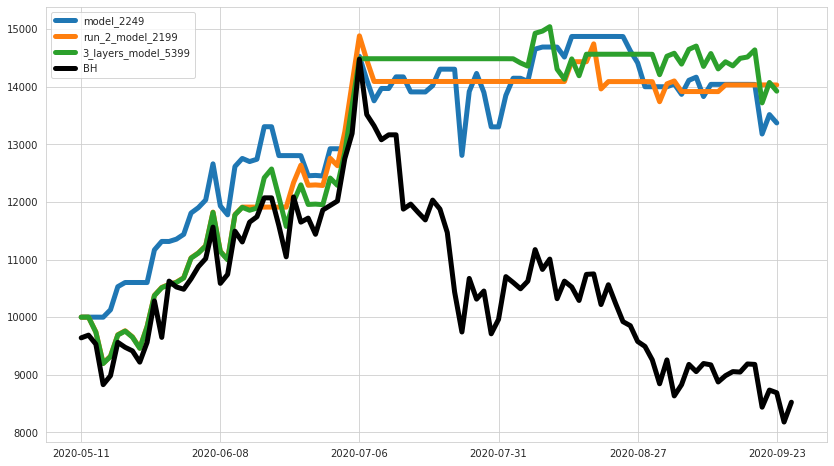

A R E A - U N D E R - C U R V E - S C O R E
model_2249 1259138
model_3599 1157239
BH 1025011


In [9]:
plt.figure(figsize=(14, 8))
for score, name in zip([a_score, c_score, d_score], [filenames[0], filenames[2], filenames[3]]):
    plt.plot(score, linewidth=5, label=name)
plt.plot(BH, 'k', linewidth=5, label='BH')
plt.legend(loc='best')
plt.xticks(ticks_test, dates_test)
plt.show()
print('A R E A - U N D E R - C U R V E - S C O R E')
for value, name in zip(aucs[:2], filenames[:2]):
    print(name, int(value))
print('BH', int(auc(x, BH)))